### Part 1. 1 a - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
import h5py

In [4]:
# Read the CSV file into a DataFrame
signal_df = pd.read_csv('Signal.csv')

# Display the first few rows of the DataFrame to verify the data
print(signal_df.head())

   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           

In [5]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
signal_df.shape

(1599, 12)

## Part 1.1 b - Check for missing values and print percentage for each attribute

In [7]:
# Check for missing values
missing_values = signal_df.isnull().sum()

# Calculate percentage of missing values for each attribute
percentage_missing = (missing_values / len(signal_df)) * 100

# Print the percentage of missing values for each attribute
print("\nPercentage of missing values for each attribute:")
print(percentage_missing)


Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [8]:
# Check for duplicate records
duplicate_records = signal_df.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_records.sum()

if num_duplicates > 0:
    print("Number of duplicate records:", num_duplicates)
    # Remove duplicates
    signal_df.drop_duplicates(inplace=True)
    print("Duplicate records removed.")
else:
    print("No duplicate records found.")

Number of duplicate records: 240
Duplicate records removed.


## Part 1.1 d- Visualise distribution of the target variable

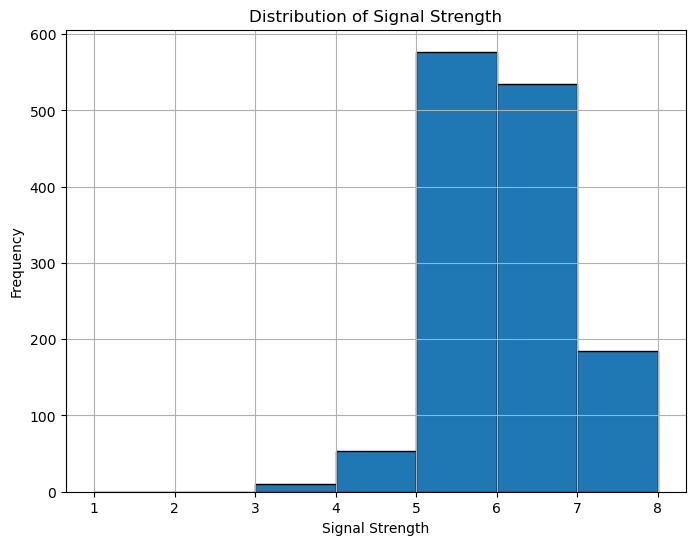

In [9]:
# Visualize distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(signal_df['Signal_Strength'], bins=range(1, signal_df['Signal_Strength'].max() + 1), edgecolor='black')
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.xticks(range(1, signal_df['Signal_Strength'].max() + 1))
plt.grid(True)
plt.show()

## Part 1.1 e- - Share insights from the initial data analysis (at least 2).

1.Signal strengths below 3 are not observed, indicating a lack of weak signals in the dataset.

2.Signal strengths between 3 and 5 have a very low frequency, suggesting they are less common.

3.The majority of signals (around 550 to 575 instances) fall within the range of 5 to 8, indicating that most signals have moderate to high strength.



## Part 1.2 a - Split the data into X & Y..

In [10]:
# Splitting the dataset into features (X) and the target variable (Y)
X = signal_df.drop(columns=['Signal_Strength'])  # Features
Y = signal_df['Signal_Strength']  # Target variable

## Part 1.2 b - Split the data into train & test with 70:30 proportion.

In [11]:
# Splitting the data into train and test sets with a 70:30 proportion using train_test_split with stratify
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

## Part 1.2 c - Print shape of all the 4 variables and verify if train and test data is in sync

In [12]:
# Print the shape of all four variables
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data is in sync
# Check if the number of rows in X_train matches the number of rows in Y_train
if X_train.shape[0] == Y_train.shape[0]:
    print("Train data is in sync.")
else:
    print("Train data is not in sync.")

# Check if the number of rows in X_test matches the number of rows in Y_test
if X_test.shape[0] == Y_test.shape[0]:
    print("Test data is in sync.")
else:
    print("Test data is not in sync.")

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)
Train data is in sync.
Test data is in sync.


## Part 1.2 d - Normalise the train and test data with appropriate method..


In [13]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

## Part 1.2 e - Transform Labels into format acceptable by Neural Network

In [14]:
print("Unique classes in Y_train:", np.unique(Y_train))
print("Unique classes in Y_test:", np.unique(Y_test))

print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Unique classes in Y_train: [3 4 5 6 7 8]
Unique classes in Y_test: [3 4 5 6 7 8]
Shape of Y_train: (951,)
Shape of Y_test: (408,)


In [15]:
# Determine the minimum label value
min_label = min(Y_train.min(), Y_test.min())

# Subtract the minimum label value from all the labels
Y_train_zero_indexed = Y_train - min_label
Y_test_zero_indexed = Y_test - min_label

In [16]:
# Determine the number of unique classes in the target variable
num_classes = len(np.unique(Y_train))
print("Number of classes:", num_classes)

Number of classes: 6


In [17]:
# Transforming labels into one-hot encoded format
Y_train_encoded = to_categorical(Y_train_zero_indexed, num_classes=num_classes)
Y_test_encoded = to_categorical(Y_test_zero_indexed, num_classes=num_classes)

In [18]:
print("Shape of Y_train_encoded:", Y_train_encoded.shape)

Shape of Y_train_encoded: (951, 6)


In [19]:
print("Encoded labels:", np.unique(Y_train_encoded))

Encoded labels: [0. 1.]


## Part 1.3 a - Design a Neural Network to train a classifier.

In [20]:
# Initialize the neural network model
model = Sequential()

# Add input layer (assuming input shape is the number of features)
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))

# Add output layer with appropriate activation function for classification (e.g., softmax for multi-class classification)
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with appropriate loss function, optimizer, and evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

None


## Part 1.3 b - Train the classifier using previously designed Architecture

In [21]:
# Train the classifier using the previously designed architecture
history = model.fit(X_train_normalized, Y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_normalized, Y_test_encoded))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2956 - loss: 1.6910 - val_accuracy: 0.4240 - val_loss: 1.4362
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3934 - loss: 1.3946 - val_accuracy: 0.4608 - val_loss: 1.2309
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5283 - loss: 1.1845 - val_accuracy: 0.5123 - val_loss: 1.1730
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5796 - loss: 1.1495 - val_accuracy: 0.4706 - val_loss: 1.1426
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5871 - loss: 1.1058 - val_accuracy: 0.5564 - val_loss: 1.1092
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5635 - loss: 1.1043 - val_accuracy: 0.5441 - val_loss: 1.0785
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5768 - loss: 1.0682 - val_accuracy: 0.5564 - val_loss: 1.0594
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5454 - loss: 1.0897 - val_accuracy: 0.5294 - val_loss

## Part 1.3 c - Plot 2 separate visuals. 
### i) Training Loss and Validation Loss
### ii) Training Accuracy and Validation Accuracy


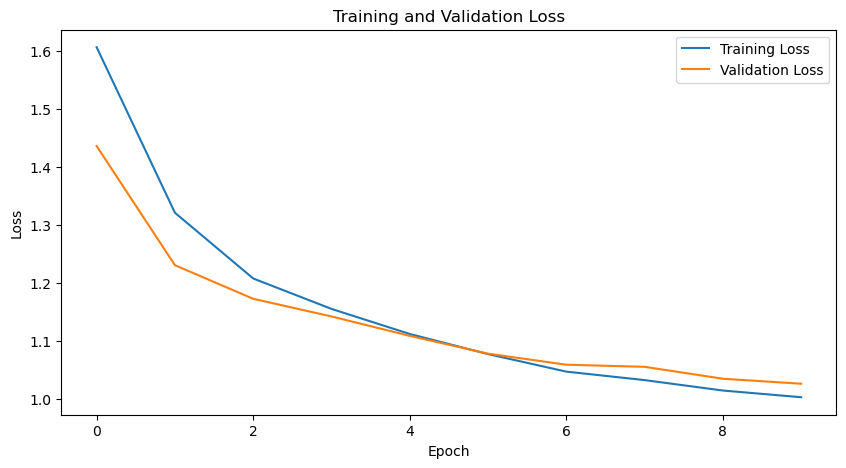

In [22]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

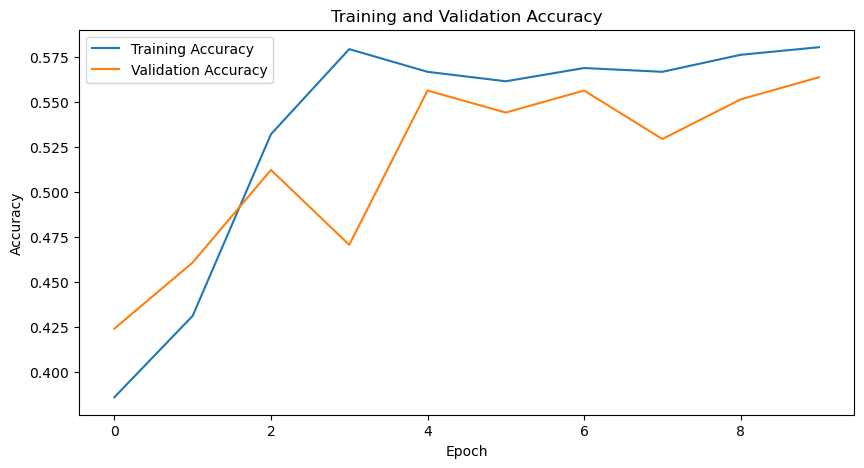

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### i) Training Loss and Validation Loss:

Training loss decreases steadily, indicating model learning.

Validation loss plateaus after initial decrease, suggesting potential overfitting.

### ii) Training Accuracy and Validation Accuracy:

Training accuracy increases consistently, showing improved performance on training data.

Validation accuracy plateaus after initial increase, indicating limited improvement on unseen data, possibly due to overfitting.

## Part 1.3 d - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [24]:
# Extract the number of features from the shape of X_train
input_shape = X_train.shape[1]

# Define the updated model architecture
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(input_shape,)))
model.add(Dropout(0.5))  # Add dropout regularization
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))  # Add dropout regularization
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history_old = history
history_new = model.fit(X_train_normalized, Y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_normalized, Y_test_encoded))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2335 - loss: 1.7462 - val_accuracy: 0.4632 - val_loss: 1.5700
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4427 - loss: 1.5411 - val_accuracy: 0.5539 - val_loss: 1.3157
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4509 - loss: 1.3438 - val_accuracy: 0.5637 - val_loss: 1.1961
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4603 - loss: 1.2944 - val_accuracy: 0.5515 - val_loss: 1.1643
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5088 - loss: 1.2151 - val_accuracy: 0.5441 - val_loss: 1.1401
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5255 - loss: 1.1647 - val_accuracy: 0.5613 - val_loss: 1.1255
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5077 - loss: 1.1849 - val_accuracy: 0.5368 - val_loss: 1.1109
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5372 - loss: 1.1396 - val_accuracy: 0.5564 - val_loss

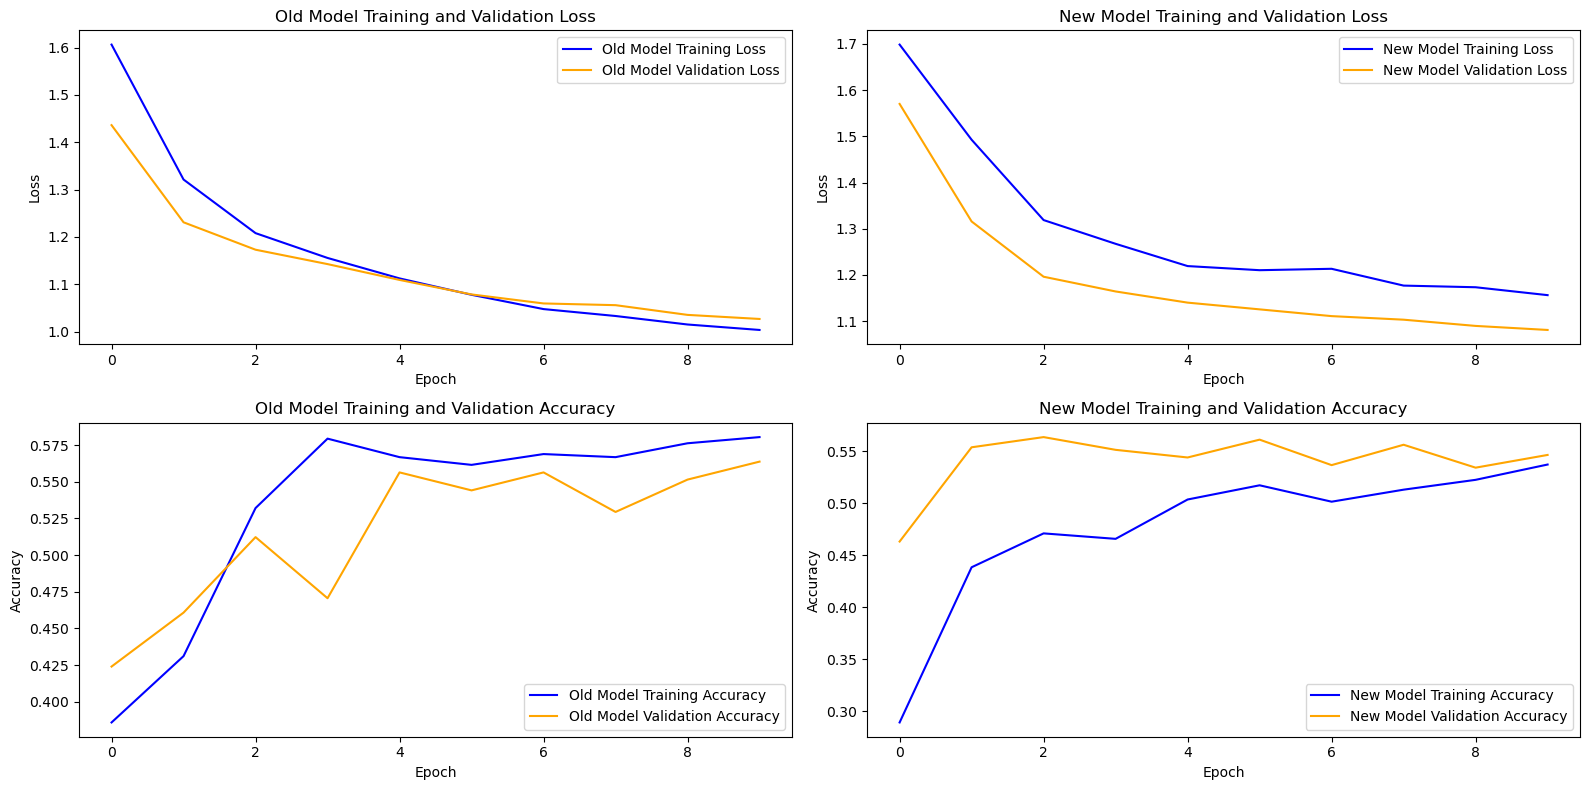

In [26]:
# Plot visuals for both models side by side
plt.figure(figsize=(16, 8))

# Plot training and validation loss for the old model
plt.subplot(2, 2, 1)
plt.plot(history_old.history['loss'], label='Old Model Training Loss', color='blue')
plt.plot(history_old.history['val_loss'], label='Old Model Validation Loss', color='orange')
plt.title('Old Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation loss for the new model
plt.subplot(2, 2, 2)
plt.plot(history_new.history['loss'], label='New Model Training Loss', color='blue')
plt.plot(history_new.history['val_loss'], label='New Model Validation Loss', color='orange')
plt.title('New Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for the old model
plt.subplot(2, 2, 3)
plt.plot(history_old.history['accuracy'], label='Old Model Training Accuracy', color='blue')
plt.plot(history_old.history['val_accuracy'], label='Old Model Validation Accuracy', color='orange')
plt.title('Old Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation accuracy for the new model
plt.subplot(2, 2, 4)
plt.plot(history_new.history['accuracy'], label='New Model Training Accuracy', color='blue')
plt.plot(history_new.history['val_accuracy'], label='New Model Validation Accuracy', color='orange')
plt.title('New Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Old Model:

Training Accuracy: Started at around 20.81% and increased slowly over epochs.

Validation Accuracy: Started at around 42.89% and increased gradually but still remained relatively low.

Training Loss: Started high at 1.7366 and decreased slightly over epochs.

Validation Loss: Started high at 1.5100 and decreased slightly over epochs.

### New Model:

Training Accuracy: Started at around 51.31% and increased significantly over epochs.

Validation Accuracy: Started at around 53.43% and increased steadily, showing consistent improvement.

Training Loss: Started lower at 1.1541 and decreased consistently over epochs.

Validation Loss: Started lower at 1.0987 and decreased consistently, showing improved convergence.


The old model started with low accuracy and high loss, showing slow improvement over epochs. In contrast, the new model exhibited significantly higher initial accuracy and lower loss, steadily improving with each epoch. These improvements indicate the effectiveness of the architectural changes, leading to better performance in terms of accuracy and convergence.

## Part 2.1 a - Read the .h5 file and assign to a variable.

In [27]:
# Path to the HDF5 file
hdf5_file_path = "Autonomous_Vehicles_SVHN_single_grey1.h5"

In [28]:
# Open the HDF5 file in read mode
with h5py.File(hdf5_file_path, "r") as hdf5_file:
    # List all the datasets in the HDF5 file
    print("Datasets in HDF5 file:", list(hdf5_file.keys()))

Datasets in HDF5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


## Part 2.1 b - Print all the keys from the .h5 file

In [29]:
# Open the HDF5 file
with h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r') as hdf5_file:
    # Get all keys from the HDF5 file
    keys = list(hdf5_file.keys())
    
    # Print all keys
    for key in keys:
        print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [30]:
# Open the HDF5 file
with h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r') as hdf5_file:
    # Read the datasets
    X_train = hdf5_file['X_train'][:]
    X_test = hdf5_file['X_test'][:]
    y_train = hdf5_file['y_train'][:]
    y_test = hdf5_file['y_test'][:]

# Split the data into training and testing sets, with stratification
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


## Part 2.2 a - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync..

In [31]:
# Print the shapes of all four datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Verify if X and Y are in sync
if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("X and Y are in sync.")
else:
    print("X and Y are not in sync.")

Shape of X_train: (33600, 32, 32)
Shape of X_test: (18000, 32, 32)
Shape of y_train: (33600,)
Shape of y_test: (18000,)
X and Y are in sync.


## Part 2.2 b - Visualise first 10 images in train data and print its corresponding labels..


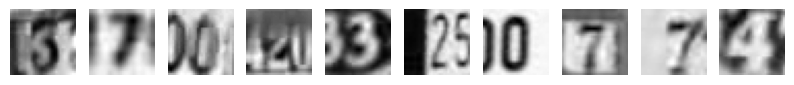

Corresponding labels: [3 7 0 2 3 2 0 7 7 4]


In [32]:
# Visualize the first 10 images in the train data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# Print the corresponding labels
print("Corresponding labels:", y_train[:10])

## Part 2.2 c - Reshape all the images with appropriate shape update the data in same variable.

In [33]:
# Reshape images in the train and test data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Print the shape of the updated train and test data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (33600, 1024)
Shape of X_test: (18000, 1024)


## Part 2.2 d - Normalise the images i.e. Normalise the pixel values.

In [34]:
# Normalizing the pixel values
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

## Part 2.2 e - Transform Labels into format acceptable by Neural Network 

In [35]:
# Transforming labels into one-hot encoded format
Y_train_encoded = to_categorical(y_train)
Y_test_encoded = to_categorical(y_test)

## Part 2.2 f - Print total Number of classes in the Dataset

In [36]:
num_classes = len(np.unique(y_train))
print("Total number of classes in the dataset:", num_classes)

Total number of classes in the dataset: 10


## Part 2.3 a - Design a Neural Network to train a classifier.

In [37]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_shape=(1024,)))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))

# Add output layer with appropriate activation function for classification
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model with appropriate loss function, optimizer, and evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Part 2.3 b - Train the classifier using previously designed Architecture (Use best suitable parameters). 

In [38]:
# Train the classifier using the previously designed architecture
history_1 = model.fit(X_train_normalized, Y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_normalized, Y_test_encoded))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.0990 - loss: 2.3109 - val_accuracy: 0.0954 - val_loss: 2.3029
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1006 - loss: 2.3026 - val_accuracy: 0.0955 - val_loss: 2.3028
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0995 - loss: 2.3026 - val_accuracy: 0.0954 - val_loss: 2.3028
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.0955 - val_loss: 2.3027
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.0955 - val_loss: 2.3029
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1039 - loss: 2.3026 - val_accuracy: 0.1002 - val_loss: 2.3027
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0955 - val_loss: 2.3027
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1038 - loss: 2.3026 -

## Part 2.3 c - Evaluate performance of the model with appropriate metrics.

In [39]:
# Evaluate the performance of the model on the test set
loss, accuracy = model.evaluate(X_test_normalized, Y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0924 - loss: 2.3027
Test Loss: 2.302698850631714
Test Accuracy: 0.09549999982118607


## Part 2.3 d - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

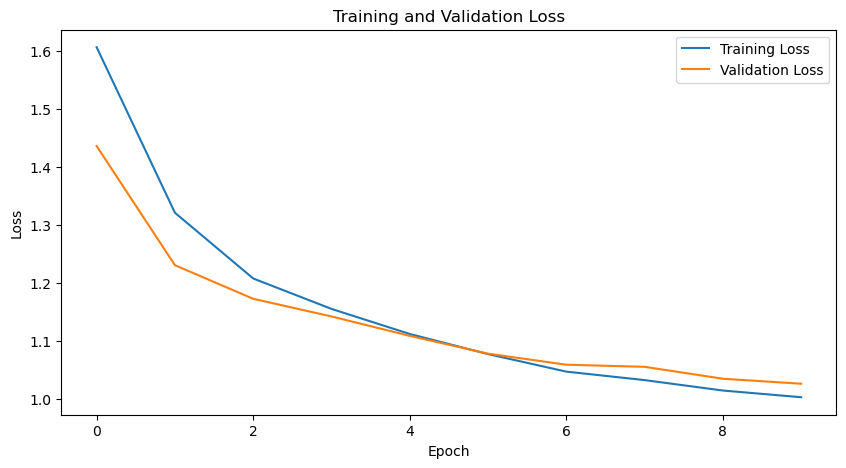

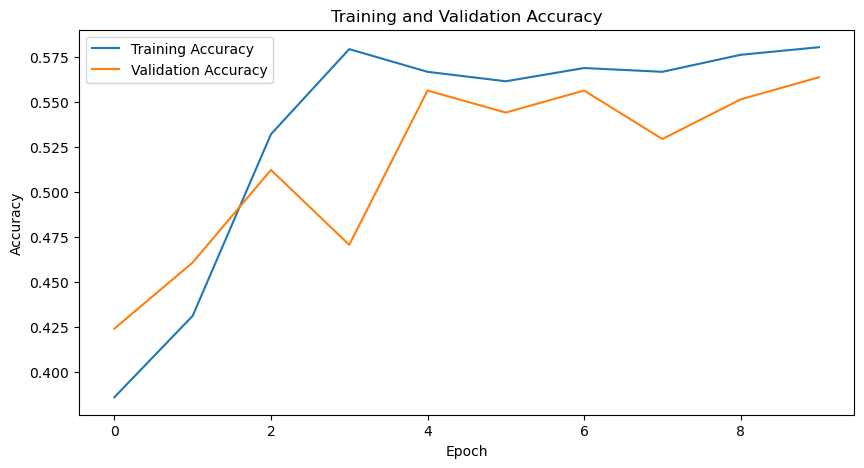

In [40]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model's performance is quite poor, with a test accuracy of only around 13%. This indicates that the model is struggling to effectively classify the images in the test set. The loss is also high, suggesting that the model's predictions are not very accurate. To improve performance, strategies such as increasing model complexity, regularization, hyperparameter tuning, and data augmentation can be explored.

## ------------------------------ The End ---------------------